In [1]:
!pip install --quiet tensorflow==2.6.2

ERROR: sqlalchemy 1.4.0 requires greenlet!=0.4.17; python_version >= "3", which is not installed.
ERROR: tensorflow-probability 0.11.1 has requirement cloudpickle>=1.3, but you'll have cloudpickle 1.2.2 which is incompatible.
ERROR: panel 0.12.1 has requirement bokeh<2.4.0,>=2.3.0, but you'll have bokeh 2.1.1 which is incompatible.
ERROR: mosaic-visual-client 1.0.0 has requirement numpy==1.17.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: mosaic-visual-client 1.0.0 has requirement pandas==0.25.1, but you'll have pandas 1.1.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement nltk==3.3, but you'll have nltk 3.5 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement numpy==1.16.1, but you'll have numpy 1.19.5 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement pandas==1.0.4, but you'll have pandas 1.1.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement scikit-learn==0.24.2, but 

In [2]:
!pip install --quiet keras==2.6.0

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import glob

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import datetime
import PIL

In [6]:
import matplotlib.pyplot as plt
#import seaborn as sns
#import cv2 as cv
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
print (tf.__version__)

2.6.2


In [8]:
#Creating Additional images for improving the performance of Model.
'''
#Creating Additional Datasets for Model training
path = glob.glob("/data/ChipsDefectClassifier/ChipsDefectClassifier/train/Defective/*.jpg")
for img in path:
    filename = img.split('/')[-1]
    location = img.split('/')[0:-1]
    new_filenameR90 = 'R90_' + filename
    new_filenameR180 = 'R180_' + filename
    new_filenameR270 = 'R270_' + filename
    image = PIL.Image.open(img)
    image_rotate90 = image.rotate(90)
    image_rotate90.save('/'.join(location) + '/' + new_filenameR90)
    image_rotate180 = image.rotate(180)    
    image_rotate180.save('/'.join(location) + '/' + new_filenameR180)
    image_rotate270 = image.rotate(270)    
    image_rotate270.save('/'.join(location) + '/' + new_filenameR270)
    
path = glob.glob("/data/ChipsDefectClassifier/ChipsDefectClassifier/train/Non_Defective/*.jpg")
for img in path:
    filename = img.split('/')[-1]
    location = img.split('/')[0:-1]
    new_filenameR90 = 'R90_' + filename
    new_filenameR180 = 'R180_' + filename
    new_filenameR270 = 'R270_' + filename
    image = PIL.Image.open(img)
    image_rotate90 = image.rotate(90)
    image_rotate90.save('/'.join(location) + '/' + new_filenameR90)
    image_rotate180 = image.rotate(180)    
    image_rotate180.save('/'.join(location) + '/' + new_filenameR180)
    image_rotate270 = image.rotate(270)    
    image_rotate270.save('/'.join(location) + '/' + new_filenameR270)    
'''

'\n#Creating Additional Datasets for Model training\npath = glob.glob("/data/ChipsDefectClassifier/ChipsDefectClassifier/train/Defective/*.jpg")\nfor img in path:\n    filename = img.split(\'/\')[-1]\n    location = img.split(\'/\')[0:-1]\n    new_filenameR90 = \'R90_\' + filename\n    new_filenameR180 = \'R180_\' + filename\n    new_filenameR270 = \'R270_\' + filename\n    image = PIL.Image.open(img)\n    image_rotate90 = image.rotate(90)\n    image_rotate90.save(\'/\'.join(location) + \'/\' + new_filenameR90)\n    image_rotate180 = image.rotate(180)    \n    image_rotate180.save(\'/\'.join(location) + \'/\' + new_filenameR180)\n    image_rotate270 = image.rotate(270)    \n    image_rotate270.save(\'/\'.join(location) + \'/\' + new_filenameR270)\n    \npath = glob.glob("/data/ChipsDefectClassifier/ChipsDefectClassifier/train/Non_Defective/*.jpg")\nfor img in path:\n    filename = img.split(\'/\')[-1]\n    location = img.split(\'/\')[0:-1]\n    new_filenameR90 = \'R90_\' + filename\n  

In [8]:
#Global Variables
TRAIN_PATH = '/data/ChipsDefectClassifier/ChipsDefectClassifier/train/'
TEST_PATH = '/data/ChipsDefectClassifier/ChipsDefectClassifier/test/'

BATCH_SIZE = 32
COLOR_MODE = 'rgb'
TARGET_SIZE = (255, 255)
GRAY_SCALL = (3,)
INPUT_SIZE = TARGET_SIZE + GRAY_SCALL
EPOCHS = 5
CLASSES = ['Defective','Non-Defective']

In [9]:
# -- Data Normalization --
data_generator = ImageDataGenerator(samplewise_center=True, #making sure that each image has a mean of 0
                                    samplewise_std_normalization=True, #and standard deviation 1
                                    horizontal_flip=True, #Randomly flip inputs horizontally
                                    validation_split=0.3,
                                    )

In [10]:
# -- Data iterators -- 
train_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                target_size=TARGET_SIZE,
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                color_mode=COLOR_MODE,
                                                subset='training',
                                                shuffle=True)         
    
validation_data = data_generator.flow_from_directory(directory=TRAIN_PATH,
                                                     target_size=TARGET_SIZE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     color_mode=COLOR_MODE,
                                                     subset='validation',
                                                     shuffle=True)             

test_data = data_generator.flow_from_directory(directory=TEST_PATH,
                                               target_size=TARGET_SIZE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical',
                                               color_mode=COLOR_MODE,
                                               shuffle=True)

Found 252 images belonging to 2 classes.
Found 108 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

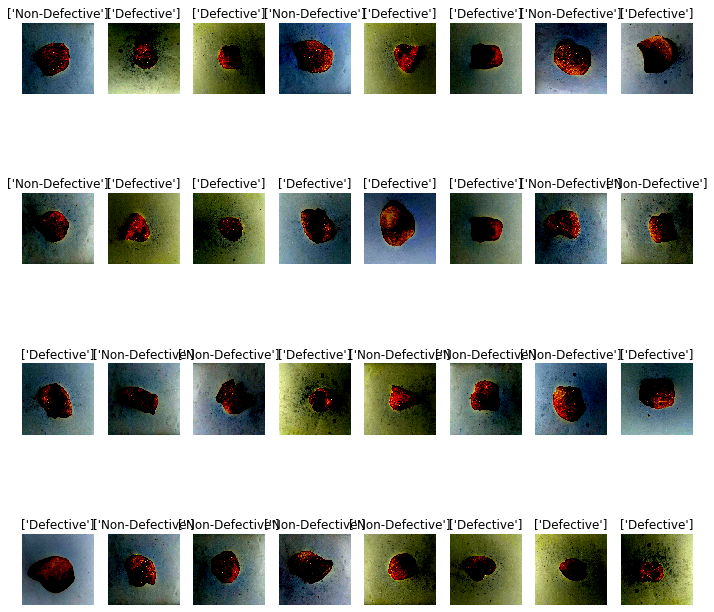

In [11]:
# -- plot random batch -- 
images, labels = train_data.next()
classes = np.asarray(CLASSES)

_, axs = plt.subplots(4, 8, figsize=(12,12))
axs = axs.flatten()
for img, label, ax in zip(images, labels, axs):
    ax.imshow(img)
    ax.axis('off')
    label = label.astype(int)
    ax.set_title(classes[label == 1])
plt.show()

In [12]:
def my_model():
  vgg19_model = VGG19(weights='imagenet',include_top=False,input_shape=INPUT_SIZE)
  vgg19_model.trainable = False
  flatten =Flatten()(vgg19_model.layers[-1].output)
  fc1 = Dense(units=4096, activation ='relu')(flatten)
  dropout = Dropout(0.2)(fc1)
  fc2 = Dense(units=1024,activation='relu')(dropout)
  output = Dense(2, activation='softmax')(fc2)
  model = Model(inputs = vgg19_model.input, outputs=output)
  model.summary()
  return model

In [13]:
model = my_model()

80150528/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 255, 255, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 255, 255, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 255, 255, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 127, 127, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 127, 127, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 127, 127, 128)     147584    
______________________________________________________________

In [14]:
# -- Define optimizer and loss --
opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy()

In [15]:
# -- Compile model --
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [16]:
# -- Callbacks --
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='my_vgg19_model.h5', 
                                                    monitor='accuracy', verbose=1, 
                                                    save_best_only=True, 
                                                    save_weights_only=False, 
                                                    mode='auto', 
                                                    save_freq='epoch')
    
earlystoping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                                    min_delta=0, 
                                                    patience=5,  #Number of epochs with no improvement after which training will be stopped.
                                                    verbose=1, 
                                                    mode='auto')
    
log_dir = './logs/fit/' + datetime.datetime.now().strftime('%m.%d.%Y--%H-%M-%S')
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, 
                                                 histogram_freq=1, 
                                                 write_graph=True,
                                                 write_images=False, 
                                                 update_freq='epoch')

In [17]:
# -- Train model --
history = model.fit(x=train_data, 
                        epochs=EPOCHS, 
                        steps_per_epoch=len(train_data), 
                        verbose=1, 
                        validation_data=validation_data, 
                        validation_steps=1)

Epoch 1/5
8/8 [==============================] - 125s 16s/step - loss: 17.5196 - accuracy: 0.5119 - val_loss: 3.3895 - val_accuracy: 0.5312
Epoch 2/5
8/8 [==============================] - 119s 15s/step - loss: 1.2915 - accuracy: 0.6032 - val_loss: 0.7845 - val_accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 119s 15s/step - loss: 0.3431 - accuracy: 0.8254 - val_loss: 0.2445 - val_accuracy: 0.8750
Epoch 4/5
8/8 [==============================] - 119s 15s/step - loss: 0.1417 - accuracy: 0.9444 - val_loss: 0.1531 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 119s 15s/step - loss: 0.0602 - accuracy: 0.9802 - val_loss: 0.0878 - val_accuracy: 0.9688


In [18]:
# -- Save model -- 
model.save('/data/Model/my_VGG19_model.h5')

In [19]:
def learning_curves(history):
    '''plot learning curves'''
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Loss - Cross Entropy')
    plt.xlabel('epoch')
    plt.ylim([0,1.6])
    plt.title('Training and Validation Loss')
    
    plt.show()

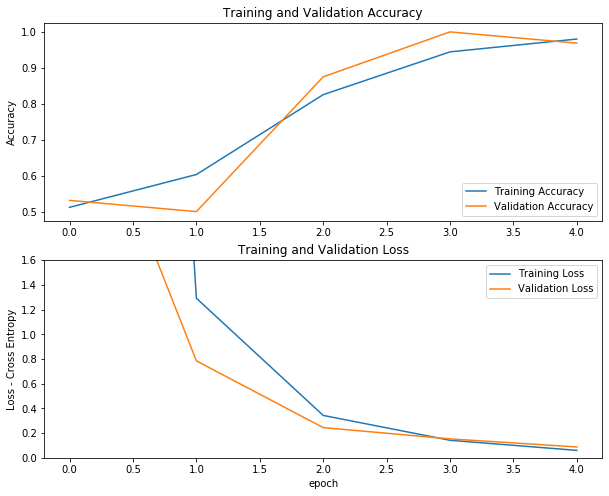

In [20]:
# -- Plot learning curves -- 
learning_curves(history)

In [21]:
# -- Evaluate the model on the test data -- 
loss, accuracy = model.evaluate(x=test_data)
print("test loss: ", loss, ", test acc: " , 100*accuracy, "%")

1/1 [==============================] - 5s 5s/step - loss: 0.0872 - accuracy: 1.0000
test loss:  0.08722434192895889 , test acc:  100.0 %


In [22]:
pred_probability = model.predict_generator(test_data)

In [23]:
y_prod = []
y_pred = []

for i in pred_probability:
    y_prod.append(i[0])
    y_pred.append(0 if i[0] < 0.5 else 1)
print (y_prod)
print (y_pred)

[0.99733645, 0.99752575, 0.24243113, 0.99980515, 0.085104264, 0.02265954, 0.0067177946, 0.9705363, 0.4550767, 0.9890399, 0.9957243, 0.56462425]
[1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]


In [24]:
test_data.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [30]:
import PIL
file = '/data/ChipsDefectClassifier/ChipsDefectClassifier/test/Defective/IMG_20210319_011145.jpg'
#file = '/data/ChipsDefectClassifier/ChipsDefectClassifier/test/Non_Defective/IMG_20210318_231142.jpg'
image_shape = (256,256,3)
#image = PIL.Image.open(file)
#to_newscale = np.array(image)
#print (to_newscale.shape)

image = PIL.Image.open(file)
image = image.resize((255,255))
to_newscale = np.array(image)
print (to_newscale.shape)
to_numpy = np.expand_dims(to_newscale, axis = 0)
print (to_numpy.shape)
model.predict_generator(to_numpy)[0][0]

(255, 255, 3)
(1, 255, 255, 3)


1.0

In [27]:
from connector.mosaicio import MosaicioConnector
ioConnector = MosaicioConnector()

from mosaicml import *
from mosaicml.constants import MLModelFlavours

from mosaicml import register_model, add_version

In [31]:
#Modified Score Function for new version
@scoring_func
def score(input_model, request):
    import PIL
    import numpy as np
    if request.method == 'POST':
        if 'file1' not in request.files:
            return 'No file part'
        file= request.files['file1']
        if file.filename == '':
            return 'No selected file'
        if file:
            image = PIL.Image.open(file)
            image = image.resize((255,255)) 
            to_newscale = np.array(image)
            to_numpy = np.expand_dims(to_newscale, axis = 0)
            p = input_model.predict_generator(to_numpy)[0][0]
            if p < 0.5:
                return "Defective"
            else:
                return "Good"

In [32]:
register_model_value = register_model(model_obj=model,
                                      scoring_func=score, 
                                      name="ChipsImageDefectDetector", 
                                      description="Chips Defect Detection using VGC19 Model",
                                      flavour=MLModelFlavours.keras, 
                                      X_train =train_data, X_test = test_data, 
                                      y_train = train_data.classes, y_test = test_data.classes,
                                      y_true=test_data.classes, y_pred=y_pred, prob=y_prod,
                                      target_names = ["Defective","Good"],
                                      model_type="classification")
print("Registering model")

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


Registering model
